In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
file_path = "../../dataset/train_val_test_preprocessed.csv"
data = pd.read_csv(file_path)
data.head()

,sentiment,content
0,sadness,im feeling rather rotten im ambitious right
1,sadness,im updating blog feel shitty
2,sadness,never make separate ever want feel like ashamed
3,joy,left bouquet red yellow tulip arm feeling slig...
4,sadness,feeling little vain one


In [7]:
data = data.dropna(subset=['content'])
X = data['content'].astype(str)
y = data['sentiment']

le = LabelEncoder()
y = le.fit_transform(y)

vec = TfidfVectorizer()
X = vec.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [8]:
svm = SVC(random_state=0)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


              precision    recall  f1-score   support

           0       0.90      0.82      0.86       539
           1       0.89      0.75      0.81       525
           2       0.81      0.96      0.88      1322
           3       0.86      0.63      0.72       302
           4       0.90      0.93      0.91      1159
           5       0.90      0.49      0.63       143

    accuracy                           0.86      3990
   macro avg       0.88      0.76      0.80      3990
weighted avg       0.87      0.86      0.86      3990



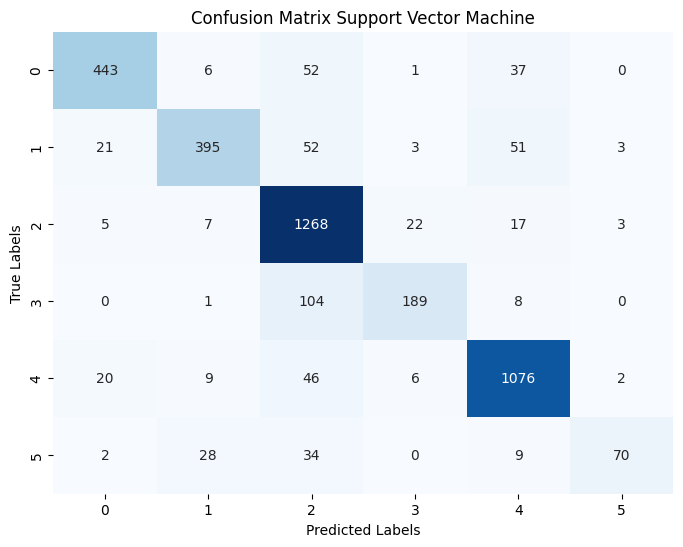

In [9]:
print(classification_report(y_test, svm_pred, zero_division='warn'))
confusion_m = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Support Vector Machine')
plt.show()


In [10]:
accuracy = accuracy_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, svm_pred, average='weighted')
f1 = f1_score(y_test, svm_pred, average='weighted')

print("Name: SVM")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)


Name: SVM
Accuracy:  0.862406015037594
Precision:  0.8662058654763761
Recall:  0.862406015037594
F1:  0.8578297732381271
